In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta Google drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')
    
    DATOS_DIR = '/content/drive/MyDrive/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    DATOS_DIR = '../MIDUSI - Teoria/Datos/'          # carpeta donde se encuentran los datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

In [3]:
# Cargar los datos
df = pd.read_csv(DATOS_DIR+"PuntosClusters.csv")
df.head()

,X1,X2,Clase
0,4.903568,4.553004,1
1,4.881951,5.019806,1
2,4.778220,4.255126,1
3,5.352336,5.147677,1
4,5.667982,4.885999,1


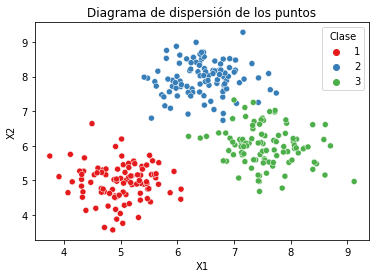

In [4]:
# Diagrama de dispersión
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Clase'].astype(str), palette='Set1')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroides')
plt.legend(title="Clase")
plt.title("Diagrama de dispersión de los puntos")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [5]:
# Separar los atributos numéricos para la normalización
X = df[['X1', 'X2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5, :])

[[-1.23775084 -1.28366702]
 [-1.25637459 -0.93805653]
 [-1.34574081 -1.50420939]
 [-0.85112677 -0.8433837 ]
 [-0.57919055 -1.03712457]]


In [6]:
# Aplicar K-Means con K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,X1,X2,Clase,Cluster
0,4.903568,4.553004,1,2
1,4.881951,5.019806,1,2
2,4.778220,4.255126,1,2
3,5.352336,5.147677,1,2
4,5.667982,4.885999,1,2


In [7]:
# Obtener los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centroides:")
print(pd.DataFrame(centroids, columns=['X1', 'X2']))

Centroides:
         X1        X2
0  6.478174  7.932355
1  7.567217  5.950381
2  4.997199  4.938034


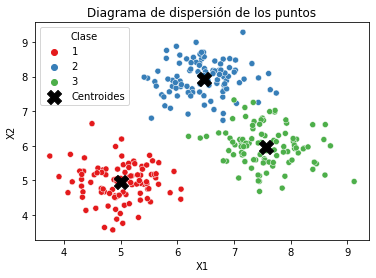

In [8]:
# Diagrama de dispersión
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Clase'].astype(str), palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroides')
plt.legend(title="Clase")
plt.title("Diagrama de dispersión de los puntos")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [9]:
# Calcular la cantidad de puntos de cada clase en cada cluster
conteo = df.groupby(['Cluster', 'Clase']).size().unstack(fill_value=0)
print("Cantidad de puntos de cada clase en cada cluster:")
print(conteo)

Cantidad de puntos de cada clase en cada cluster:
Clase      1   2   3
Cluster             
0          0  99   3
1          0   1  97
2        100   0   0


In [10]:
# Crear DataFrame con los centroides para el diagrama de coordenadas paralelas
centroids_df = pd.DataFrame(centroids, columns=['X1', 'X2'])
centroids_df['Cluster'] = ['C1', 'C2', 'C3']
centroids_df

,X1,X2,Cluster
0,6.478174,7.932355,C1
1,7.567217,5.950381,C2
2,4.997199,4.938034,C3


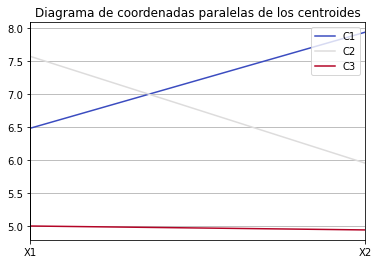

In [11]:
# Diagrama de coordenadas paralelas
plt.figure(figsize=(6, 4))
parallel_coordinates(centroids_df, class_column='Cluster', colormap='coolwarm')
plt.title("Diagrama de coordenadas paralelas de los centroides")
plt.show()
